In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor  # Change here
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv('med-insurance.csv')

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,expenses,Salary,Difference,Output
0,19,female,27.9,0,yes,southwest,16884.92,61556,44671.08,1
1,18,male,33.8,1,no,southeast,1725.55,7108,5382.45,1
2,28,male,33.0,3,no,southeast,4449.46,21837,17387.54,1
3,33,male,22.7,0,no,northwest,21984.47,83586,61601.53,1
4,32,male,28.9,0,no,northwest,3866.86,18519,14652.14,1
5,31,female,25.7,0,no,southeast,3756.62,5277,1520.38,0
6,46,female,33.4,1,no,southeast,8240.59,17448,9207.41,0
7,37,female,27.7,3,no,northwest,7281.51,77446,70164.49,1
8,37,male,29.8,2,no,northeast,6406.41,72619,66212.59,1
9,60,female,25.8,0,no,northwest,28923.14,33752,4828.86,0


In [4]:
data.drop(columns=['region'],inplace=True)


In [5]:
data.head(10)

,age,sex,bmi,children,smoker,expenses,Salary,Difference,Output
0,19,female,27.9,0,yes,16884.92,61556,44671.08,1
1,18,male,33.8,1,no,1725.55,7108,5382.45,1
2,28,male,33.0,3,no,4449.46,21837,17387.54,1
3,33,male,22.7,0,no,21984.47,83586,61601.53,1
4,32,male,28.9,0,no,3866.86,18519,14652.14,1
5,31,female,25.7,0,no,3756.62,5277,1520.38,0
6,46,female,33.4,1,no,8240.59,17448,9207.41,0
7,37,female,27.7,3,no,7281.51,77446,70164.49,1
8,37,male,29.8,2,no,6406.41,72619,66212.59,1
9,60,female,25.8,0,no,28923.14,33752,4828.86,0


In [6]:
data.describe()

,age,bmi,children,expenses,Salary,Difference,Output
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,50744.912556,40382.319484,0.677877
std,14.049960,6.098382,1.205493,12110.011240,28601.518843,27002.650312,0.467464
min,18.000000,16.000000,0.000000,1121.870000,1051.000000,46.840000,0.000000
25%,27.000000,26.300000,0.000000,4740.287500,25924.750000,16511.632500,0.000000
50%,39.000000,30.400000,1.000000,9382.030000,51648.000000,38050.235000,1.000000
75%,51.000000,34.700000,2.000000,16639.915000,76272.500000,62999.370000,1.000000
max,64.000000,53.100000,5.000000,63770.430000,99954.000000,98249.960000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   expenses    1338 non-null   float64
 6   Salary      1338 non-null   int64  
 7   Difference  1338 non-null   float64
 8   Output      1338 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 94.2+ KB


In [8]:
data.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
expenses      0
Salary        0
Difference    0
Output        0
dtype: int64

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('med-insurance.csv')

X = data.drop(['Output'], axis=1)
y = data['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children', 'expenses', 'Salary', 'Difference']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:",f1)

Accuracy: 0.9738805970149254
Precision: 0.9945945945945946
Recall: 0.968421052631579
F1-score: 0.9813333333333334


In [10]:
import pandas as pd
import numpy as np

# Load the sample data
data = pd.read_csv('med-insurance.csv')

# Define the number of outliers to introduce
num_outliers = 10

# Define the number of errors to introduce in the 'Output' column
num_errors = 20

# Randomly select rows and modify values to introduce outliers
for _ in range(num_outliers):
    row_index = np.random.randint(0, len(data))  # Select a random row index
    column_to_modify = np.random.choice(['age', 'bmi', 'children', 'expenses', 'Salary', 'Difference'])
    data.loc[row_index, column_to_modify] *= np.random.uniform(2, 10)  # Increase the value by a random factor

# Introduce errors in the 'Output' column
for _ in range(num_errors):
    row_index = np.random.randint(0, len(data))  # Select a random row index
    data.loc[row_index, 'Output'] = 1 - data.loc[row_index, 'Output']  # Flip the value (0 to 1 or 1 to 0)

# Print modified data to verify the changes
print(data)

       age     sex   bmi  children smoker     region  expenses   Salary  \
0     19.0  female  27.9       0.0    yes  southwest  16884.92  61556.0   
1     18.0    male  33.8       1.0     no  southeast   1725.55   7108.0   
2     28.0    male  33.0       3.0     no  southeast   4449.46  21837.0   
3     33.0    male  22.7       0.0     no  northwest  21984.47  83586.0   
4     32.0    male  28.9       0.0     no  northwest   3866.86  18519.0   
...    ...     ...   ...       ...    ...        ...       ...      ...   
1333  50.0    male  31.0       3.0     no  northwest  10600.55  43460.0   
1334  18.0  female  31.9       0.0     no  northeast   2205.98  97034.0   
1335  18.0  female  36.9       0.0     no  southeast   1629.83  18257.0   
1336  21.0  female  25.8       0.0     no  southwest   2007.95  69491.0   
1337  61.0  female  29.1       0.0    yes  northwest  29141.36  19144.0   

      Difference  Output  
0       44671.08       1  
1        5382.45       0  
2       17387.54  

In [11]:
data = pd.read_csv('modified_sample_data2.csv')

# Define features and target variable
X = data.drop(['Output'], axis=1)
y = data['Output']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children', 'expenses', 'Salary', 'Difference']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,Salary,Difference,Output
0,19.0,female,27.9,0,yes,southwest,16884.92,61556.0,44671.080000,1
1,18.0,male,33.8,1,no,southeast,1725.55,7108.0,5382.450000,1
2,28.0,male,33.0,3,no,southeast,4449.46,21837.0,17387.540000,1
3,33.0,male,22.7,0,no,northwest,21984.47,83586.0,61601.530000,1
4,32.0,male,28.9,0,no,northwest,3866.86,18519.0,41535.407192,1


In [13]:


# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:",f1)

Accuracy: 0.9477611940298507
Precision: 0.9679144385026738
Recall: 0.9576719576719577
F1-score: 0.9627659574468085


In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv('modified_sample_data2.csv')

# Calculate the difference between Salary and expenses
data['Difference'] = data['Salary'] - data['expenses']

# Apply custom logic to create the output column
data['Output'] = [2 if diff > 0.2 * expense else (0 if diff < 0 else 1) for diff, expense in zip(data['Difference'], data['expenses'])]

# Save the modified DataFrame as a CSV file
data.to_csv('modified_sample_data_with_output.csv',index=False)

In [15]:
import pandas as pd
import numpy as np

# Load the provided dataset
data = pd.read_csv('modified_sample_data_with_output.csv')

# Select 20 random row indices to modify
num_errors = 250
random_indices = np.random.choice(data.index, num_errors, replace=False)

# Modify the 'Output' column for the selected random indices
for index in random_indices:
    # Generate a random value between 0 and 2 (inclusive) excluding the current value
    new_value = np.random.choice([0, 1, 2])
    while new_value == data.at[index, 'Output']:
        new_value = np.random.choice([0, 1, 2])
    data.at[index, 'Output'] = new_value

# Save the modified dataset to a new CSV file
data.to_csv('a.csv', index=False)

print("Modified dataset saved successfully.")

Modified dataset saved successfully.


In [16]:
data.head(15)

,age,sex,bmi,children,smoker,region,expenses,Salary,Difference,Output
0,19.0,female,27.9,0,yes,southwest,16884.92,61556.0,44671.08,0
1,18.0,male,33.8,1,no,southeast,1725.55,7108.0,5382.45,2
2,28.0,male,33.0,3,no,southeast,4449.46,21837.0,17387.54,2
3,33.0,male,22.7,0,no,northwest,21984.47,83586.0,61601.53,2
4,32.0,male,28.9,0,no,northwest,3866.86,18519.0,14652.14,2
5,31.0,female,25.7,0,no,southeast,3756.62,5277.0,1520.38,2
6,46.0,female,33.4,1,no,southeast,8240.59,17448.0,9207.41,2
7,37.0,female,27.7,3,no,northwest,7281.51,77446.0,70164.49,2
8,37.0,male,29.8,2,no,northeast,6406.41,72619.0,66212.59,1
9,60.0,female,25.8,0,no,northwest,28923.14,33752.0,4828.86,1


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the dataset
data = pd.read_csv('a.csv')

# Modify the target variable based on three classes
data['Output'] = data['Difference'].apply(lambda x: 2 if x > 0 else (0 if x < 0 else 1))

# Define features and target variable
X = data.drop(['Output', 'Difference'], axis=1)
y = data['Output']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children', 'expenses', 'Salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

def custom_predict(X):
    differences = X['Salary'] - X['expenses']
    predictions = [2 if diff > 0.2 * expense else (0 if diff < 0 else 1) for diff, expense in zip(differences, X['expenses'])]
    return predictions

# Predictions using custom predict function
y_pred_custom = custom_predict(X_test)

# Evaluation
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom, average='weighted')
recall_custom = recall_score(y_test, y_pred_custom, average='weighted')
f1_custom = f1_score(y_test, y_pred_custom, average='weighted')

print("Custom Predict - Accuracy:", accuracy_custom)
print("Custom Predict - Precision:", precision_custom)
print("Custom Predict - Recall:", recall_custom)
print("Custom Predict - F1-score:",f1_custom)

Custom Predict - Accuracy: 0.9813432835820896
Custom Predict - Precision: 1.0
Custom Predict - Recall: 0.9813432835820896
Custom Predict - F1-score: 0.9905746734104942


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
abc = pd.read_csv('modified_sample_data_with_output.csv')
abc.tail()

,age,sex,bmi,children,smoker,region,expenses,Salary,Difference,Output
1333,50.0,male,31.0,3,no,northwest,10600.55,43460.0,32859.45,2
1334,18.0,female,31.9,0,no,northeast,2205.98,97034.0,94828.02,2
1335,18.0,female,36.9,0,no,southeast,1629.83,18257.0,16627.17,2
1336,21.0,female,25.8,0,no,southwest,2007.95,69491.0,67483.05,2
1337,61.0,female,29.1,0,yes,northwest,29141.36,19144.0,-9997.36,0


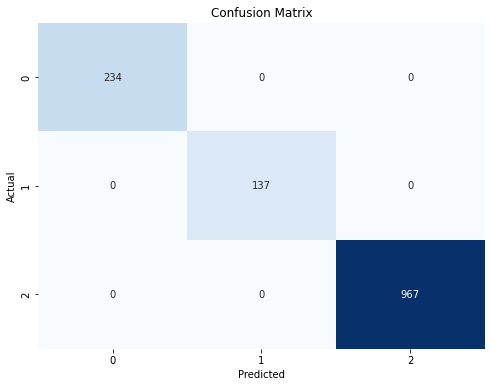

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the modified sample data
data = pd.read_csv('a.csv')

# Encode categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])

# Define features and target variable
X = data.drop(['Output'], axis=1)
y = data['Output']

# Train a RandomForestClassifier for the confusion matrix
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


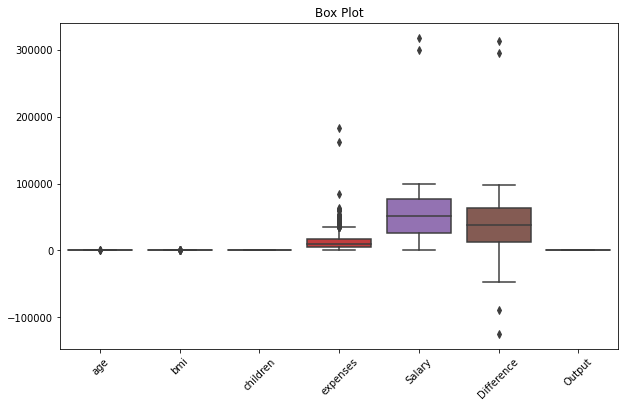

In [20]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(['sex', 'smoker', 'region'], axis=1))
plt.title('Box Plot')
plt.xticks(rotation=45)
plt.show()


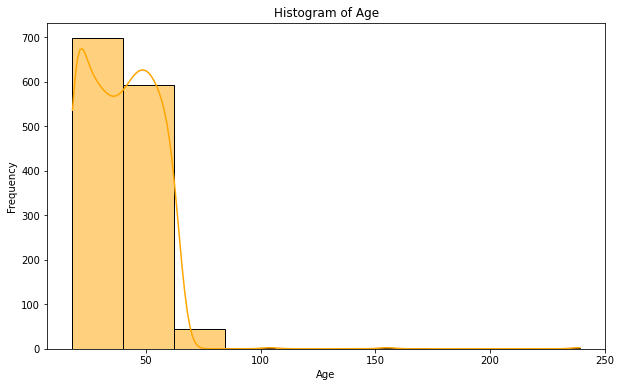

In [21]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=10, kde=True, color='orange')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

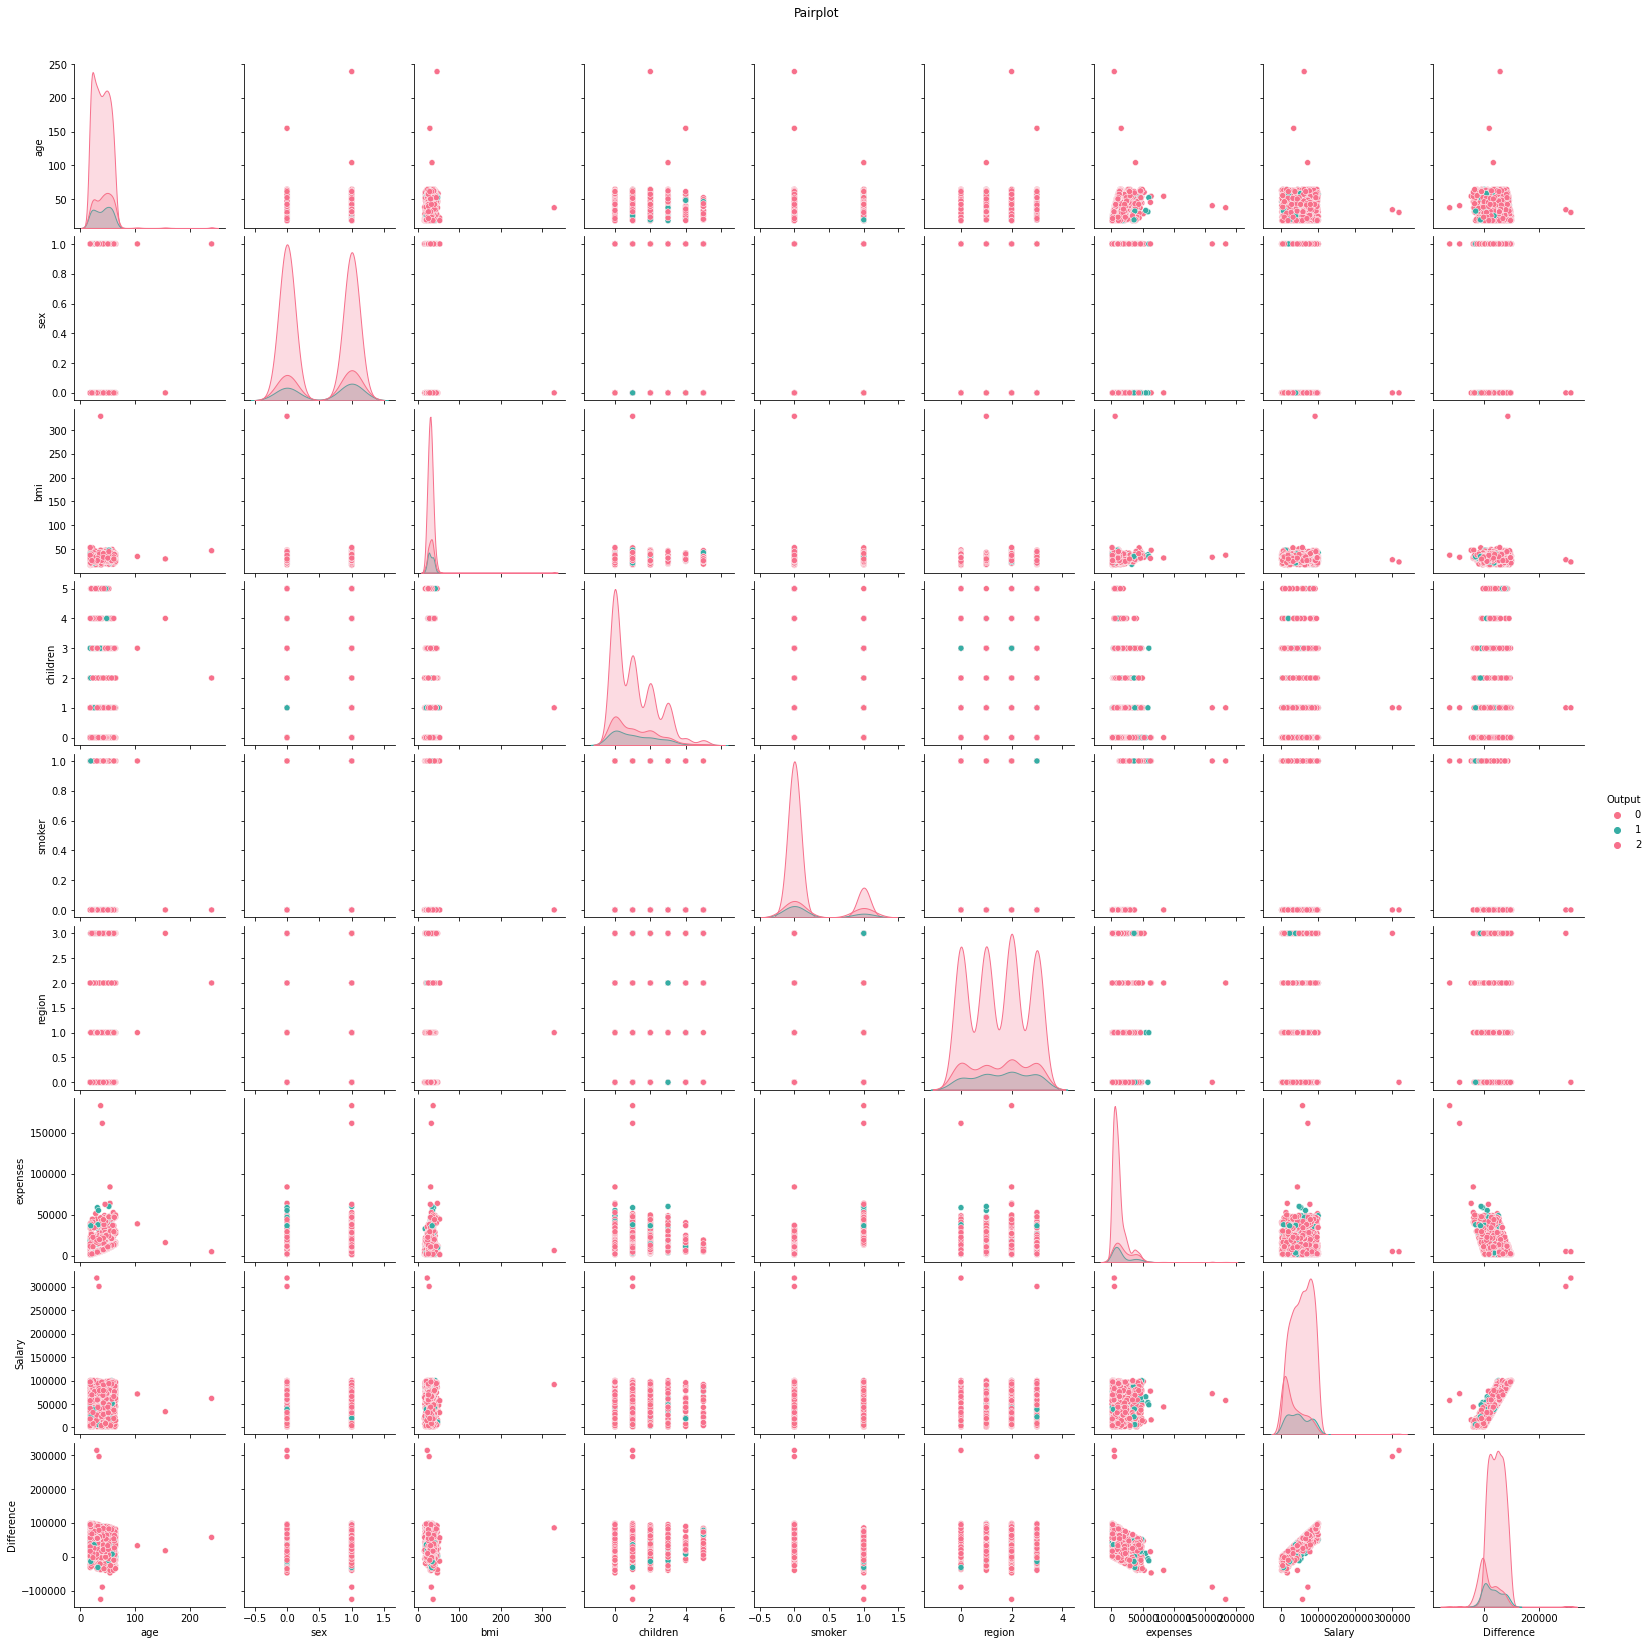

In [22]:

# Pairplot
sns.pairplot(data, hue='Output', palette='husl')
plt.suptitle('Pairplot', y=1.02)
plt.show()

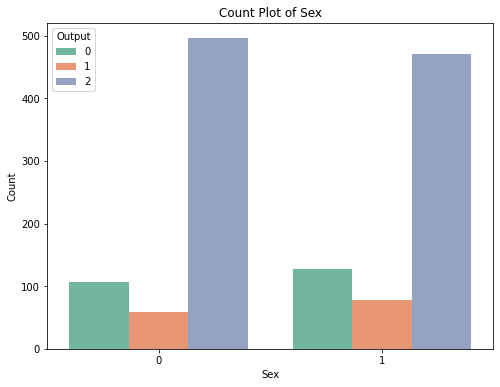

In [23]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sex', hue='Output', palette='Set2')
plt.title('Count Plot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


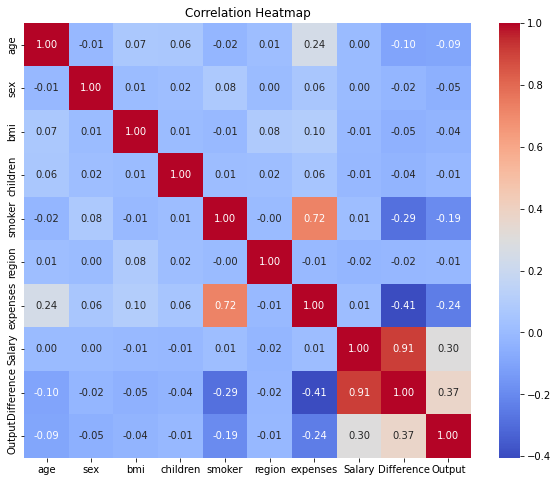

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [25]:

import pickle

# Assuming the provided code is already executed and the model is trained

# Save the trained model to a pickle file
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model,file)